#  LOK SABHA ELECTIONS - 2019 ANALYSIS

# Importing Libraries

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data extraction

In [3]:
df=pd.read_csv("C:\\Users\\ASUS\\Desktop\\ec2019\\LS_2.0.csv")

In [4]:
df.shape

(2263, 19)

# Data Cleaning

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('\n','_') 
df.rename(columns = {'over total electors _in constituency':'total_voters',
                    'over total votes polled _in constituency':'votes_polled',
                    'total electors':'total_electors'},inplace=True)
df.head(1)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790


In [6]:
df.describe(include="all")

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
count,2263,2263,2263,2263.000000,2263,2018,2018,2018,2018.000000,2018,2018,2018,2018,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
unique,36,539,2014,NaN,133,126,2,29,NaN,3,13,1979,1226,NaN,NaN,NaN,NaN,NaN,NaN
top,Uttar Pradesh,AURANGABAD,NOTA,NaN,BJP,Lotus,MALE,0,NaN,GENERAL,Post Graduate,Not Available,Rs 0\n ~,NaN,NaN,NaN,NaN,NaN,NaN
freq,274,14,245,NaN,420,420,1760,1242,NaN,1392,502,22,634,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.239505,NaN,NaN,NaN,NaN,52.273538,NaN,NaN,NaN,NaN,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,NaN,NaN,NaN,0.426876,NaN,NaN,NaN,NaN,11.869373,NaN,NaN,NaN,NaN,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,43.250000,NaN,NaN,NaN,NaN,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06


In [7]:
df.dtypes

state              object
constituency       object
name               object
winner              int64
party              object
symbol             object
gender             object
criminal_cases     object
age               float64
category           object
education          object
assets             object
liabilities        object
general_votes       int64
postal_votes        int64
total_votes         int64
total_voters      float64
votes_polled      float64
total_electors      int64
dtype: object

In [8]:

df["criminal_cases"].replace(np.nan,0,inplace=True)
df["criminal_cases"].replace("Not Available",0,inplace=True)

In [9]:
df["criminal_cases"]=df["criminal_cases"].astype("int")
df["criminal_cases"].dtype

dtype('int32')

In [10]:
df_winner =df[df.winner==1] #data of winners only
df_winner.shape

(542, 19)

In [11]:
fdf=df[df["party"]!="NOTA"]

fdf.isnull().sum()
#no null values is data

state             0
constituency      0
name              0
winner            0
party             0
symbol            0
gender            0
criminal_cases    0
age               0
category          0
education         0
assets            0
liabilities       0
general_votes     0
postal_votes      0
total_votes       0
total_voters      0
votes_polled      0
total_electors    0
dtype: int64

In [12]:
df.head(5)


,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [13]:
df["assets"]=df["assets"].str.split("~", expand=True)[0]
df["assets"]

0            Rs 30,99,414\n 
1          Rs 1,84,77,888\n 
2          Rs 3,64,91,000\n 
3                        NaN
4          Rs 7,42,74,036\n 
                ...         
2258         Rs 48,90,000\n 
2259    Rs 1,28,78,51,556\n 
2260      Rs 90,36,63,001\n 
2261       Rs 5,85,77,327\n 
2262                     NaN
Name: assets, Length: 2263, dtype: object

In [14]:
df["assets"] = df["assets"].str.replace("[^0-9]", "", regex=True)

In [15]:
df["assets"]= pd.to_numeric(df["assets"], errors='coerce').fillna(0).astype('int64')
df["assets"].max()

8950179170

In [16]:
df.head(2)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,"Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,"Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790


In [11]:
df["liabilities"]=df["liabilities"].str.split("~", expand=True)[0]
df["liabilities"]
df["liabilities"] = df["liabilities"].str.replace("[^0-9]", "", regex=True)

In [12]:
df["liabilities"] = pd.to_numeric(df["liabilities"], errors='coerce').fillna(0).astype('int64')
df["liabilities"].max()

1547511439

In [20]:
df.party.replace("TRS","BRS",inplace=True)

In [21]:
df.head(2)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,BRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790


In [22]:

df.sort_values(by="state", inplace=True) # sorting Data
df.head(1)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,Hand,MALE,0,52.0,GENERAL,Graduate Professional,132233012,80450870,95249,59,95308,29.926744,45.954156,318471


# Exploratory Data Analysis

# Parties and vote percentage

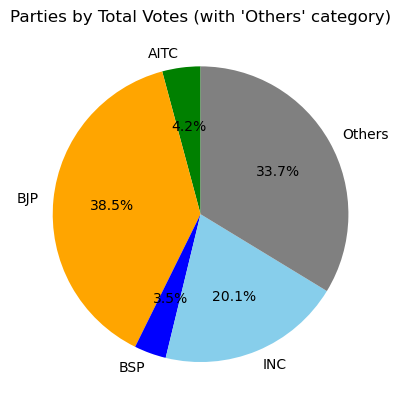

Parties having less than 3% of votes is considered as others


In [23]:
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
top_parties = df.pivot_table(index="party", values="total_votes", aggfunc="sum").sort_values(by="total_votes", ascending=False)
# Calculate the total votes and the threshold for "Others"
total_votes = top_parties['total_votes'].sum()
threshold = 0.03* total_votes
# Categorize parties with less than 3% of the total votes as "Others"
top_parties['party_category'] = top_parties.apply(lambda row: row.name if row['total_votes'] >= threshold else 'Others', axis=1)
# Group by the new 'party_category' and sum the votes
grouped_parties = top_parties.groupby('party_category')['total_votes'].sum()
# Assign different colors to each category
category_colors = {'Others': 'gray', 'BJP': 'orange', 'INC': 'skyblue', 'AITC': 'green',"BSP":"blue"}
# Get colors for each category
colors = [category_colors[category] for category in grouped_parties.index]
# Plotting the pie chart
plt.pie(grouped_parties, labels=grouped_parties.index, colors=colors, autopct='%1.1f%%', startangle=90)
# Set title
plt.title("Parties by Total Votes (with 'Others' category)")
# Show the pie chart
plt.show()
print("Parties having less than 3% of votes is considered as others")

# PARTIES AND NO OF CANDIDATES CONTESTED - TOP 20

In [122]:
Seat_contested= df["party"].value_counts().head(20)
Seat_contested=Seat_contested.reset_index()
Seat_contested.columns=["party","contested"]
Seat_contested.party.values

array(['BJP', 'INC', 'NOTA', 'IND', 'BSP', 'CPI(M)', 'VBA', 'AITC', 'SP',
       'NTK', 'MNM', 'SHS', 'AAP', 'YSRCP', 'TDP', 'DMK', 'AIADMK', 'BJD',
       'NCP', 'RJD'], dtype=object)

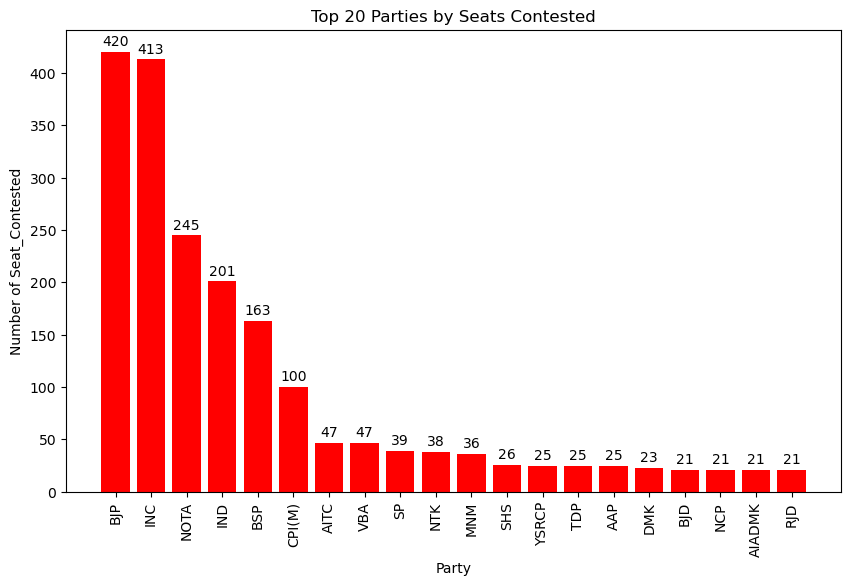

In [35]:
plt.figure(figsize=(10,6))
plt.bar(x=Seat_contested["party"], height=Seat_contested["contested"], color='r')
plt.title('Top 20 Parties by Seats Contested')
plt.xlabel('Party')
plt.ylabel('Number of Seat_Contested')
plt.xticks( rotation='vertical')

# Use zip with x and y directly
for x, y in zip(Seat_contested["party"], Seat_contested["contested"]):
    plt.text(x, y + 3, str(y), ha='center', va='bottom')

plt.show()


# PARTIES AND NO OF SEATS WON [MPs] - TOP 20

In [119]:
Results=df[df.winner==1].party.value_counts().head(20)
Results=Results.reset_index()
Results.columns=["party","won"]
Results.head(5)

,party,won
0,BJP,303
1,INC,52
2,DMK,23
3,YSRCP,22
4,AITC,22


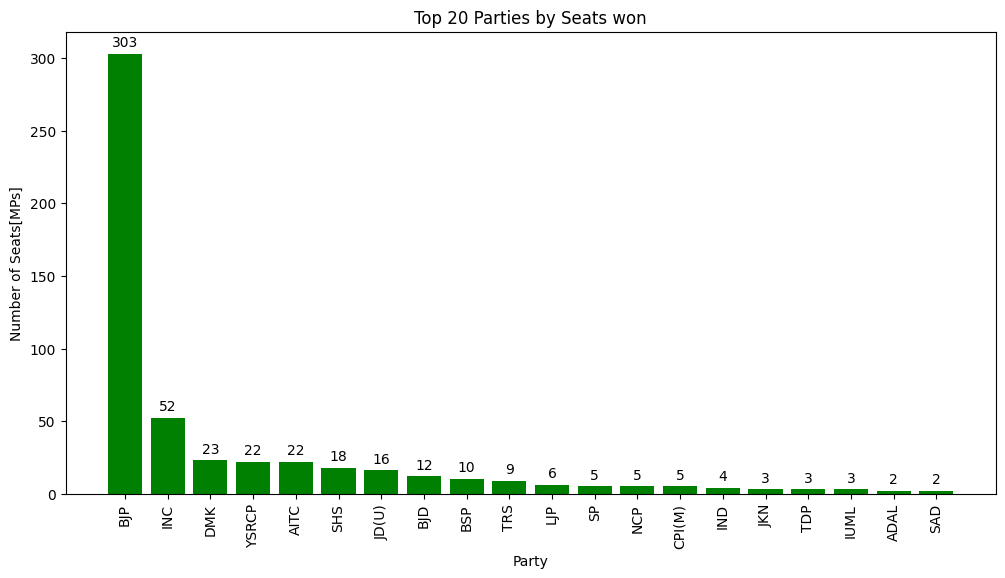

In [120]:
plt.figure(figsize=(12,6))
plt.bar(x=Results["party"], height=Results["won"], color='g')
plt.title('Top 20 Parties by Seats won')
plt.xlabel('Party')
plt.ylabel('Number of Seats[MPs]')
plt.xticks( rotation='vertical')
for x, y in zip(Results["party"],Results["won"]):
    plt.text(x, y + 3, str(y), ha='center', va='bottom')
plt.show()

In [123]:
Sucess_rate_partywise=Seat_contested.merge(Results,on="party",how="inner")
Sucess_rate_partywise.rename(columns={"count_x":"contested","count_y":"won"},inplace=True)
Sucess_rate_partywise["success rate"]=Sucess_rate_partywise.won/Sucess_rate_partywise.contested*100
Sucess_rate_partywise.sort_values(by=["contested"],ascending=False,inplace=True)
Sucess_rate_partywise

,party,contested,won,success rate
0,BJP,420,303,72.142857
1,INC,413,52,12.590799
2,IND,201,4,1.990050
3,BSP,163,10,6.134969
4,CPI(M),100,5,5.000000
5,AITC,47,22,46.808511
6,SP,39,5,12.820513
7,SHS,26,18,69.230769
8,YSRCP,25,22,88.000000
9,TDP,25,3,12.000000


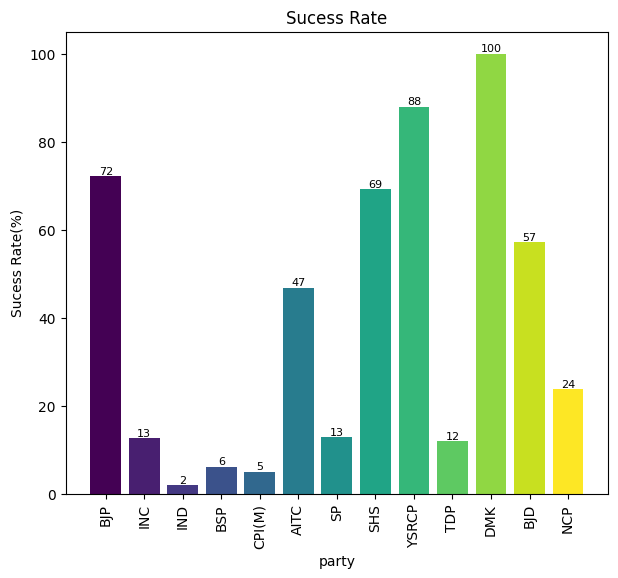

In [124]:
plt.figure(figsize=(7, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(Sucess_rate_partywise)))
plt.bar(x=Sucess_rate_partywise["party"], height=Sucess_rate_partywise["success rate"],color=colors)
plt.xlabel('party')
plt.ylabel('Sucess Rate(%)')
plt.title('Sucess Rate')
plt.xticks( rotation='vertical') # Rotate x-axis labels vertically)
for x, y in zip(Sucess_rate_partywise["party"],Sucess_rate_partywise["success rate"]):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
plt.show()



## Statewise Election Results ##

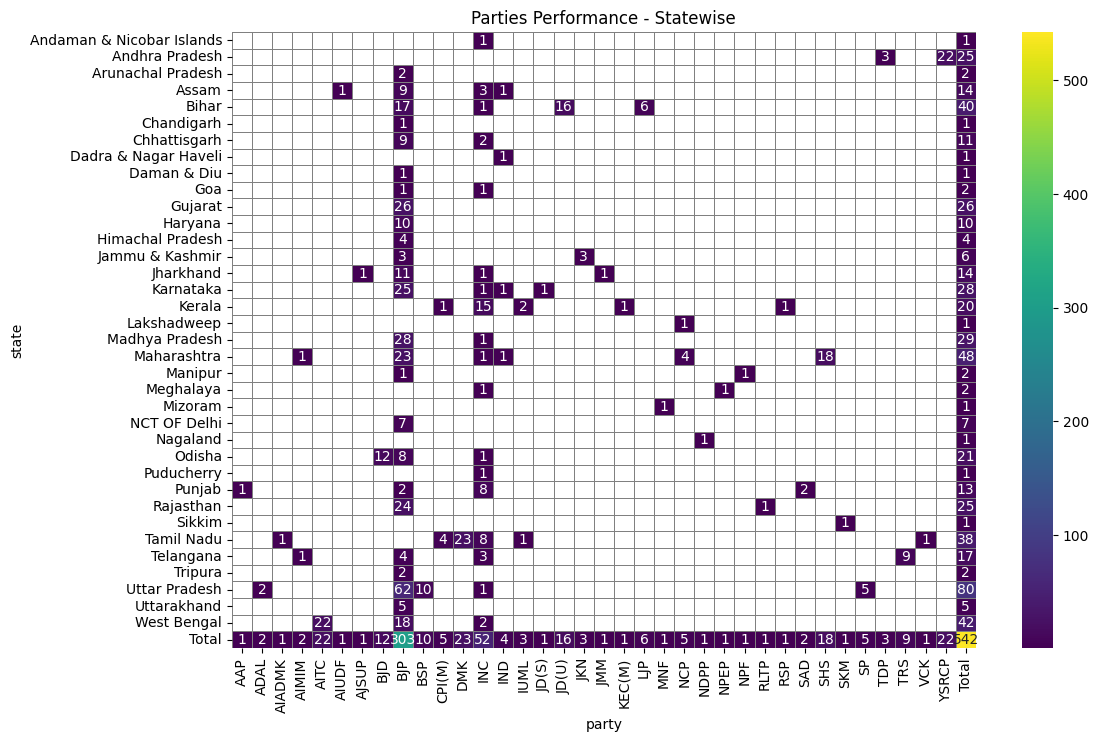

In [116]:
df_winner=df[df.winner==1]
heatmap_data =df_winner.pivot_table(index='state', columns='party', values='constituency',aggfunc="count",margins=True,margins_name="Total")
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=0.5, linecolor='gray')
plt.title('Parties Performance - Statewise')
plt.show()

## Statewise Seat Distribution ##

In [352]:

Seat_distribition=df.pivot_table(index="state",values="constituency",aggfunc="nunique").sort_values(by='constituency',ascending=False).reset_index()


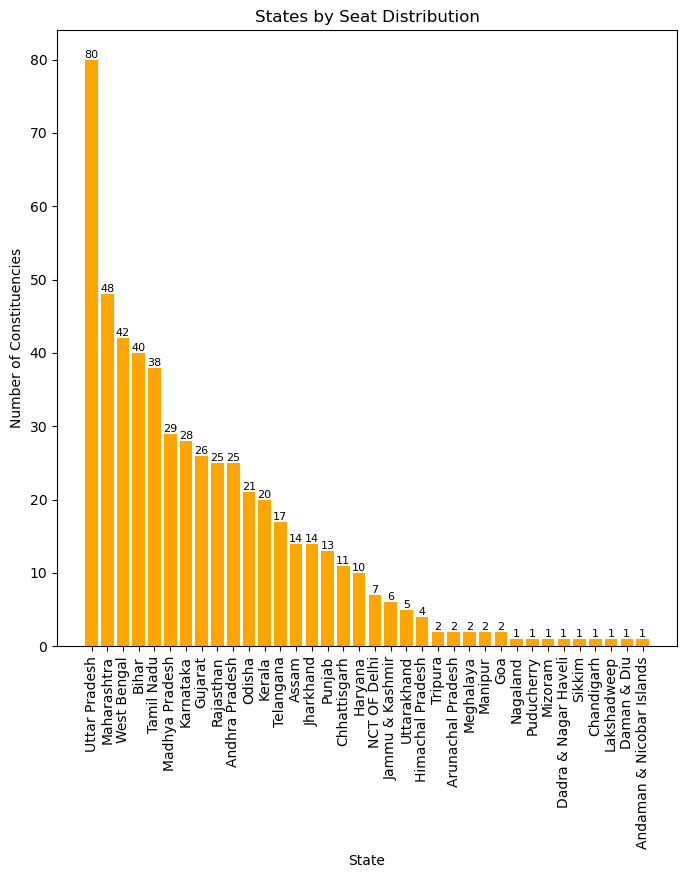

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

plt.bar(x=Seat_distribition["state"], height=Seat_distribition["constituency"], color="orange")
plt.title('States by Seat Distribution')
plt.xlabel('State')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation="vertical")

# Annotating each bar with its value
for x,y in zip(Seat_distribition["state"],Seat_distribition["constituency"]):
    plt.text(x,y,str(y),ha='center', va='bottom', fontsize=8)

plt.show()



## Opposition performance [2nd rank party] - ALL 542 SEATS

In [5]:
conn = sqlite3.connect(':memory:')
# Write the DataFrame to a table in the database
df.to_sql('elc', conn, index=False)
# Execute SQL queries on the DataFrame
query = 'SELECT * FROM elc'
result_df = pd.read_sql(query, conn)
result_df.head(2)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790


In [66]:
result_rank=pd.read_sql_query("SELECT state,constituency ,party, rank() over(partition by state,constituency order by total_votes desc)  as result FROM elc",con=conn)
result_rank.head(2)

,state,constituency,party,result
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,INC,1
1,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,BJP,2


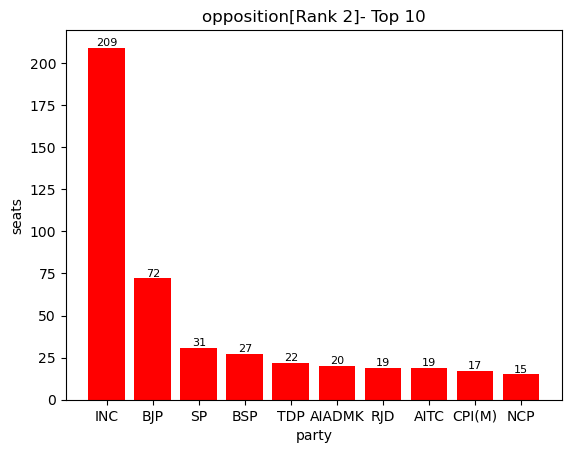

In [347]:
strongest_opposition= result_rank[(result_rank.result==2)].party.value_counts().head(10).reset_index()
strongest_opposition.columns=["party","count"]
plt.bar(x=strongest_opposition["party"],height=strongest_opposition["count"],color="r")
plt.title("opposition[Rank 2]- Top 10")
plt.xlabel("party")
plt.ylabel("seats")
for x,y in zip(strongest_opposition["party"],strongest_opposition["count"]):
    plt.text(x,y,str(y),ha='center', va='bottom', fontsize=8)
plt.show()

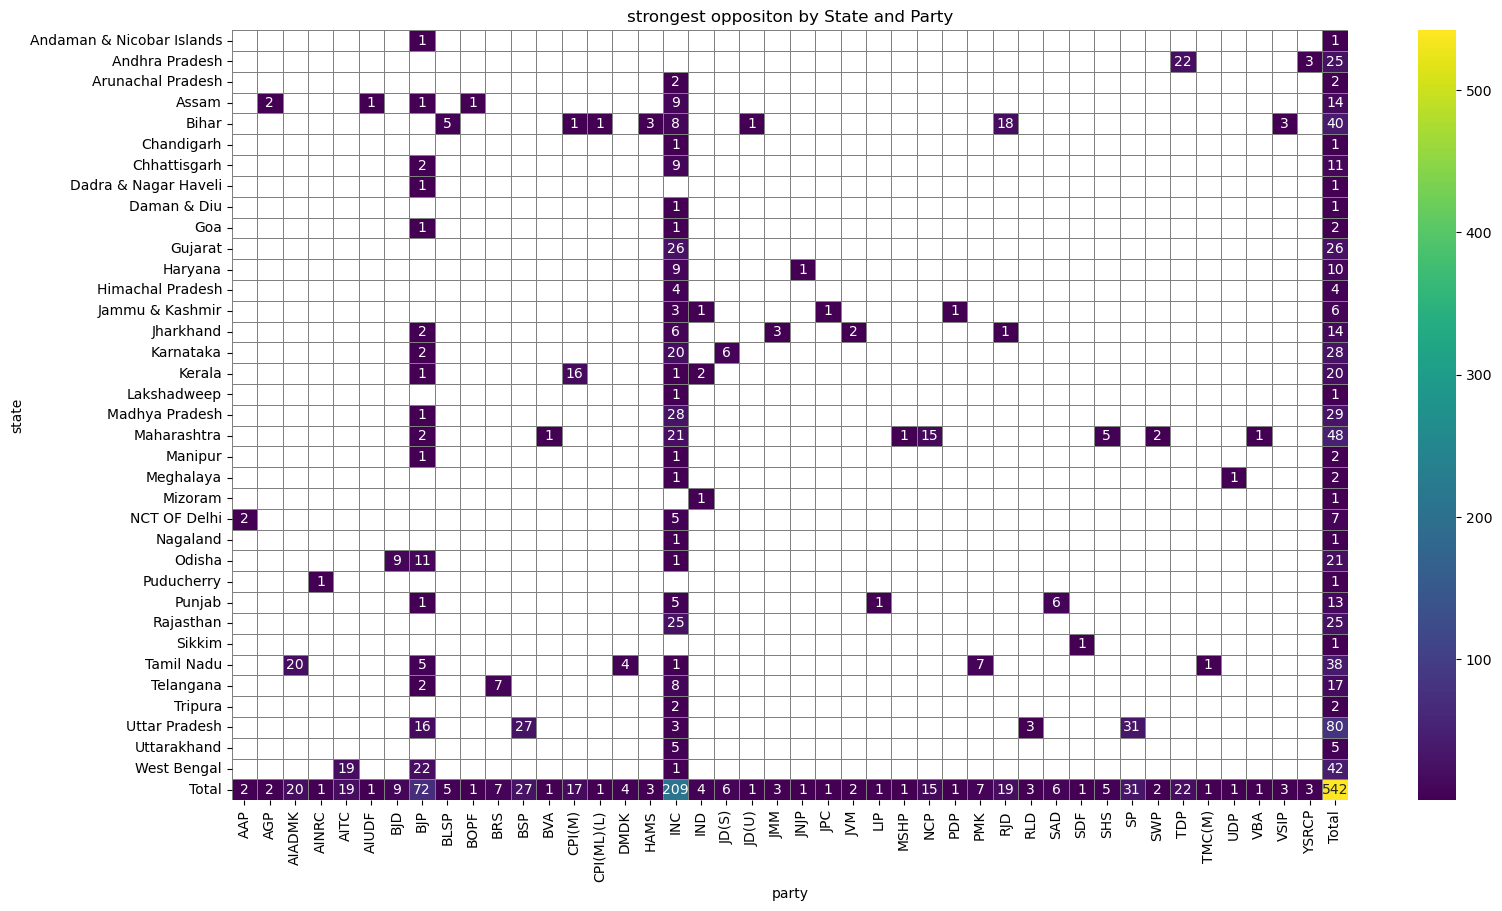

In [74]:
strongest_opposition_statewise =result_rank[(result_rank.result==2)]
strongest_opposition_statewise
heatmap_data= strongest_opposition_statewise.pivot_table(
    index='state',
    columns='party',
    values='constituency',
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)
plt.figure(figsize=(18,10 ))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=0.5, linecolor='gray')

plt.title('strongest oppositon by State and Party')
plt.show()


# Age and Elections

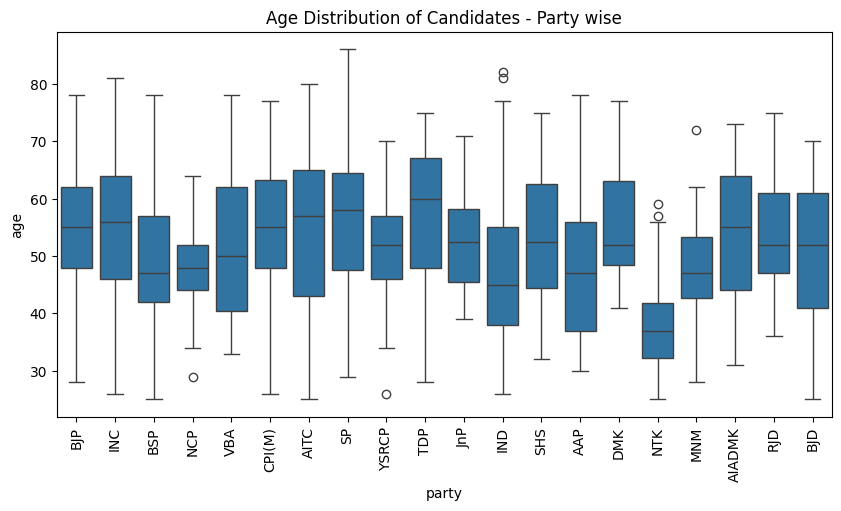

In [66]:
top_20_party_seat_contested=df[df["party"].isin(['BJP', 'INC', 'JnP', 'IND', 'BSP', 'CPI(M)', 'AITC', 'VBA', 'SP',
       'NTK', 'MNM', 'SHS', 'YSRCP', 'TDP', 'AAP', 'DMK', 'BJD', 'NCP',
       'AIADMK', 'RJD'])]
plt.figure(figsize=(10,5))
sns.boxplot(x=top_20_party_seat_contested.party,y=top_20_party_seat_contested.age)
plt.xticks(rotation="vertical")
plt.title("Age Distribution of Candidates - Party wise")
plt.show()

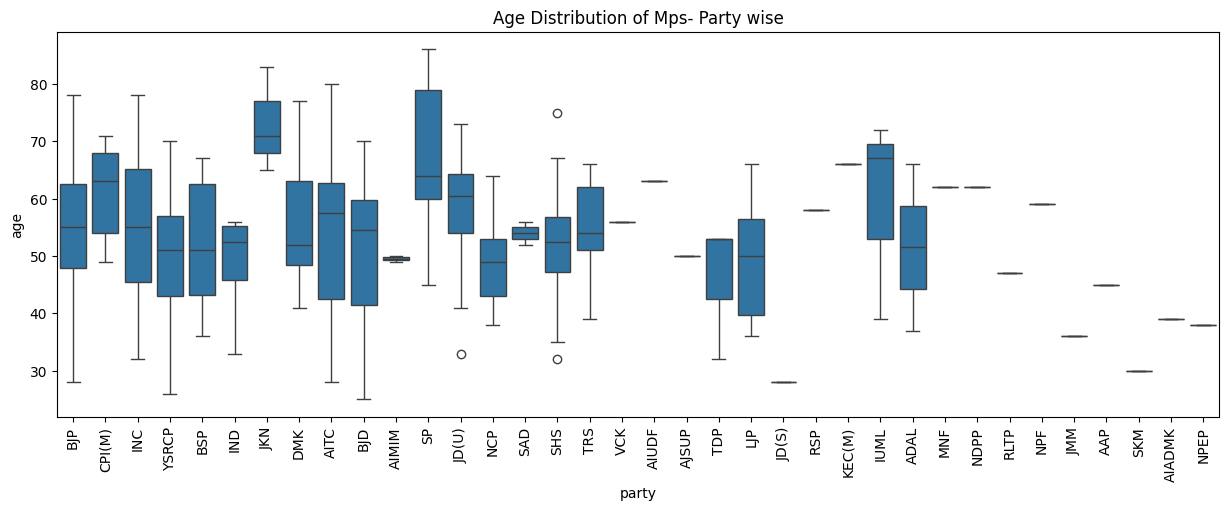

In [67]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df_winner.party,y=df_winner.age)
plt.xticks(rotation="vertical")
plt.title("Age Distribution of Mps- Party wise")
plt.show()

# Age vs Representation and sucess Rate

In [392]:
import pandas as pd
# Assuming you have a DataFrame named df with an 'age' column
bins = [25, 35, 45, 55, 65, 75, 85, 95]
group_labels = ['25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-95']
# Use pd.cut to create the age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=group_labels,include_lowest=True,right=False) #right=false exclude the upper bin(upper limit)


In [401]:
age_group_contested=df["age_group"].value_counts().reset_index()
age_group_contested.columns=["age_group","Candidates"]
df_winner=df[df.winner==1]
age_group_won=df_winner["age_group"].value_counts().reset_index()
age_group_won.columns=["age_group","Mps"]


In [423]:
success_rate=age_group_contested.merge(age_group_won,on="age_group",how="inner")
success_rate


,age_group,Candidates,Mps
0,55-64,561,164
1,45-54,552,157
2,35-44,408,84
3,65-74,297,102
4,25-34,157,24
5,75-84,41,10
6,85-95,2,1


In [428]:
success_rate["Representation_election"]=(success_rate.Candidates/success_rate.Candidates.sum())*100
success_rate["Representation_parliament"]=(success_rate.Mps/success_rate.Mps.sum())*100
success_rate["success_rate"]=success_rate.Mps/success_rate.Candidates*100
success_rate.sort_values(by="age_group",inplace=True)
success_rate

,age_group,Candidates,Mps,Representation_election,Representation_parliament,success_rate
4,25-34,157,24,7.779980,4.428044,15.286624
2,35-44,408,84,20.218038,15.498155,20.588235
1,45-54,552,157,27.353816,28.966790,28.442029
0,55-64,561,164,27.799802,30.258303,29.233512
3,65-74,297,102,14.717542,18.819188,34.343434
5,75-84,41,10,2.031715,1.845018,24.390244
6,85-95,2,1,0.099108,0.184502,50.000000


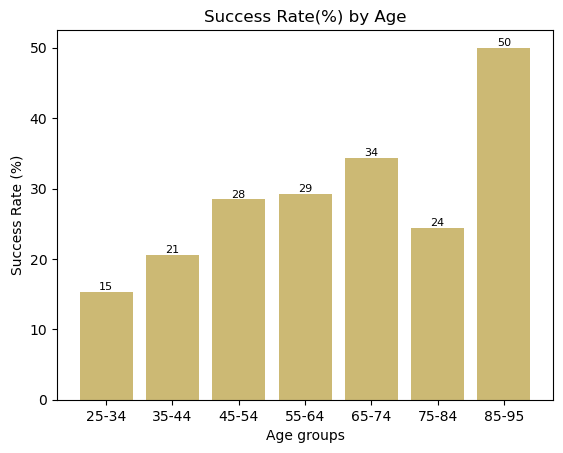

In [431]:
plt.bar(x=success_rate.age_group,height=success_rate.success_rate,color="y")
plt.title("Success Rate(%) by Age")
plt.xlabel("Age groups")
plt.ylabel("Success Rate (%)")
for x, y in zip(success_rate.age_group, success_rate.success_rate):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
plt.show()
plt.show()

# Education and Elections - Top 5 party

In [78]:
TOP_five_by_seat_contested=df[(df.party=="BJP")|(df.party=="INC")|(df.party=="IND")|(df.party=="BSP")|(df.party=="CPI(M)")]
TOP_five_by_seat_contested.head(2)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,Hand,MALE,0,52.0,GENERAL,Graduate Professional,132233012,80450870,95249,59,95308,29.926744,45.954156,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,Lotus,MALE,1,46.0,GENERAL,Graduate Professional,85140573,4633914,93772,129,93901,29.484945,45.275750,318471


In [125]:
education_contested=TOP_five_by_seat_contested.pivot_table(index=["party"],columns="education",values="constituency",aggfunc="count")
education_contested.rename(columns={"constituency":"count"})
education_contested.head(2)

education,10th Pass,12th Pass,5th Pass,8th Pass,Doctorate,Graduate,Graduate Professional,Illiterate,Literate,Not Available,Others,Post Graduate,Post Graduate\n
party,,,,,,,,,,,,,
BJP,38.0,54.0,4.0,9.0,19.0,93.0,75.0,1.0,1.0,NaN,15.0,110.0,1.0
BSP,23.0,24.0,4.0,13.0,4.0,31.0,20.0,NaN,7.0,2.0,5.0,30.0,NaN


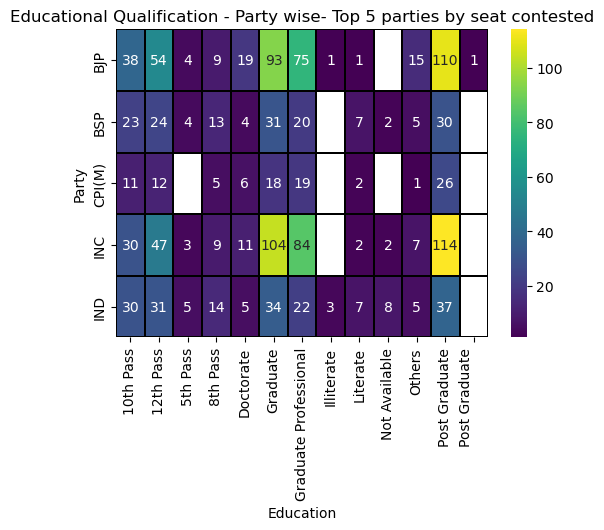

In [130]:

plt.figure(figsize=(6, 4))
sns.heatmap(
    education_contested,
    cmap='viridis',
    annot=True,
    fmt='g',
    linewidths=.2,  # Set the width of the grid lines
    linecolor='k'  # Set the color of the grid lines
)

plt.title('Educational Qualification - Party wise- Top 5 parties by seat contested')
plt.xlabel('Education')
plt.ylabel('Party')
plt.show()


(422, 20)

In [110]:
education_mps=df_winner.pivot_table(index="party",columns="education",values="constituency",aggfunc="count",margins=True,margins_name="Total")
education_mps.rename(columns={"constituency":"count"})
education_mps.head(2)

education,10th Pass,12th Pass,5th Pass,8th Pass,Doctorate,Graduate,Graduate Professional,Illiterate,Literate,Others,Post Graduate,Post Graduate\n,Total
party,,,,,,,,,,,,,
AAP,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ADAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2


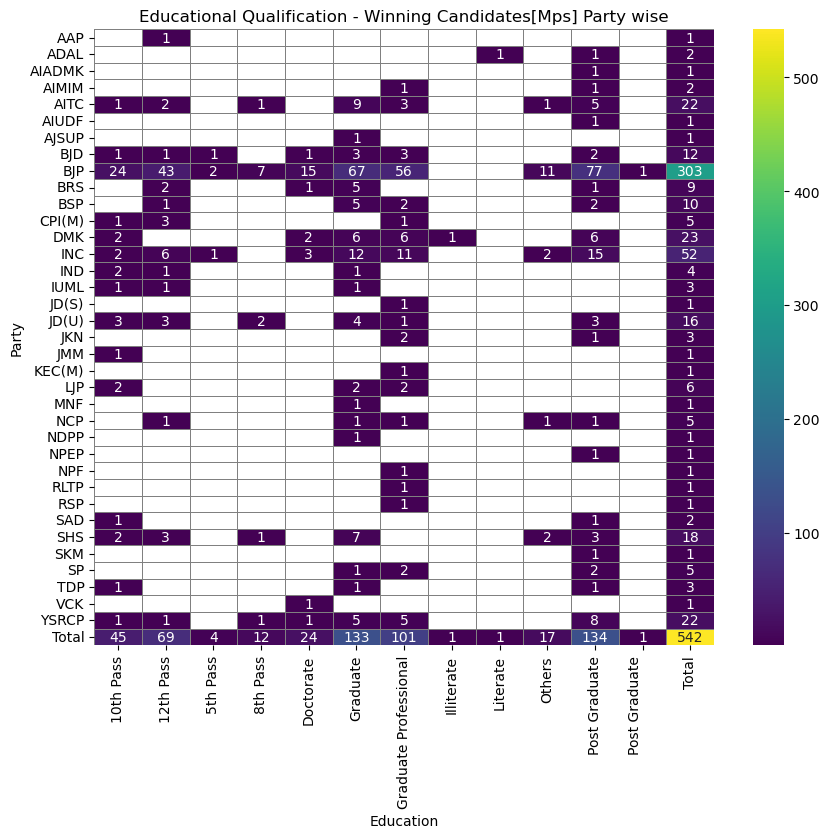

In [115]:

plt.figure(figsize=(10,8))
sns.heatmap(education_mps, cmap='viridis', annot=True, fmt='g', linewidths=0.5, linecolor='gray')  # Set the color of the grid lines)
plt.title('Educational Qualification - Winning Candidates[Mps] Party wise')
plt.xlabel('Education')
plt.ylabel('Party')
plt.show()


# GENDER AND ELECTIONS

In [135]:
df_gender_contested=df.gender.value_counts().reset_index()
df_gender_contested.columns=["gender","candidates"]
df_gender_contested

,gender,candidates
0,MALE,1760
1,FEMALE,258


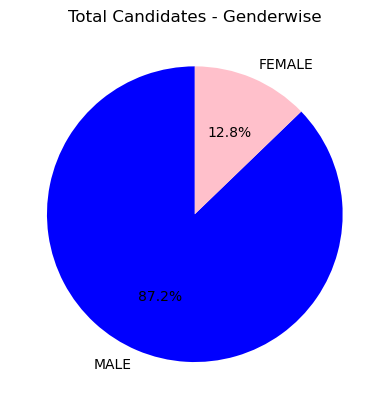

In [136]:
plt.pie(df_gender_contested['candidates'], labels=df_gender_contested['gender'], colors=[ 'blue','pink'], autopct='%1.1f%%', startangle=90)
plt.title("Total Candidates - Genderwise")
plt.show()

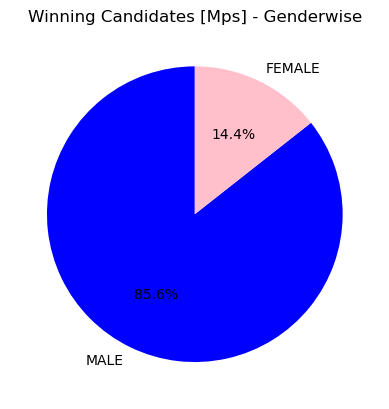

In [143]:
import matplotlib.pyplot as plt
gender_mps= df_winner['gender'].value_counts().reset_index()
gender_mps.columns=["gender","Mps"]
colors = [ 'blue','pink']
plt.pie(gender_mps["Mps"], labels=gender_mps.gender, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Winning Candidates [Mps] - Genderwise")
plt.show()

In [131]:
df_female_win_percent =df[(df.gender=="FEMALE")&(df.winner==1)].shape[0]/df[df.gender=="FEMALE"].shape[0] *100
print(df_female_win_percent)
df_male_win_percent =df[(df.gender=="MALE")&(df.winner==1)].shape[0]/df[df.gender=="MALE"].shape[0] *100
print(df_male_win_percent)

30.23255813953488
26.36363636363636


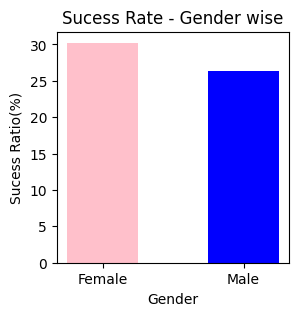

In [84]:
plt.figure(figsize=(3,3))
plt.bar(x=["Female","Male"],height=[df_female_win_percent,df_male_win_percent],color=['pink', 'blue'], width=0.5)
plt.title("Sucess Rate - Gender wise")
plt.xlabel("Gender")
plt.ylabel("Sucess Ratio(%)")
plt.show()

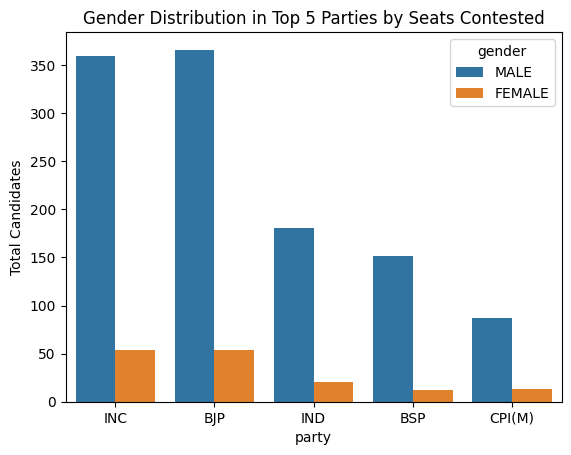

In [85]:
sns.countplot(x=TOP_five_by_seat_contested.party,hue=TOP_five_by_seat_contested.gender)
plt.xlabel("party")
plt.ylabel("Total Candidates")
plt.title("Gender Distribution in Top 5 Parties by Seats Contested")
plt.show()

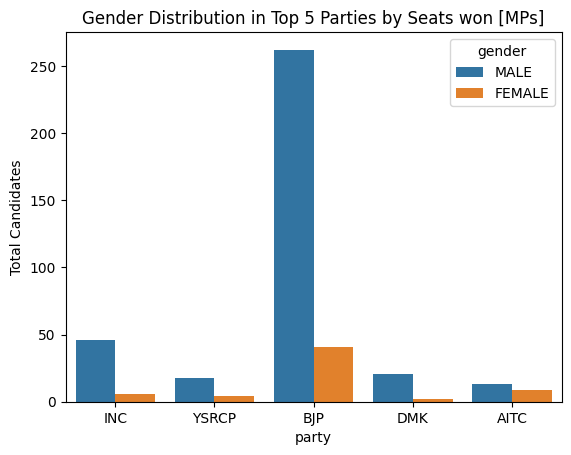

In [86]:
sns.countplot(x=TOP_five_by_seat_won.party,hue=TOP_five_by_seat_won.gender)
plt.xlabel("party")
plt.ylabel("Total Candidates")
plt.title("Gender Distribution in Top 5 Parties by Seats won [MPs]")
plt.show()

## ASSETS ANALYSIS ##

In [13]:
bins = [0, 1000000, 10000000, 250000000, 500000000, 1000000000, 2500000000, 5000000000, 10000000000]

group_names = [
    "0-10 Lac",
    "10 Lac - 1 Crore",
    "1 Crore - 25 Crore",
    "25 Crore - 50 Crore",
    "50 Crore - 100 Crore",
    "100 Crore - 250 Crore",
    "250 Crore - 500 Crore",
    "500 Crore - 1000 Crore"
]

df["assets_inwords"] = pd.cut(df["assets"], bins, labels=group_names, include_lowest=True,right=False)


In [14]:
assets_review=df["assets_inwords"].value_counts().reset_index()

assets_review.columns=["assets_range","candidates"]
assets_review.sort_values(by="assets_range",inplace=True)

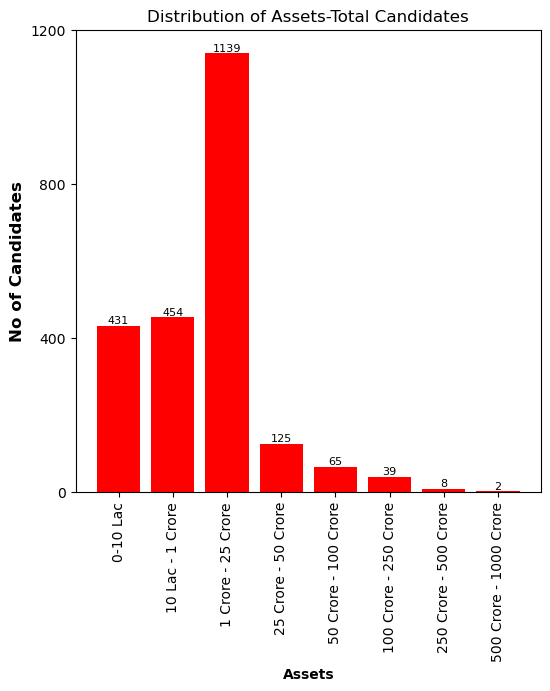

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.bar(x=assets_review["assets_range"], height=assets_review["candidates"],color="r")
plt.xlabel('Assets', weight='bold', fontsize=10)
plt.ylabel('No of Candidates', weight='bold', fontsize=12)
plt.title('Distribution of Assets-Total Candidates')
plt.yticks(np.arange(0,1201,400))

plt.xticks( rotation='vertical')  # Rotate x-axis labels vertically)
for x, y in zip(assets_review["assets_range"], assets_review["candidates"]):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

plt.show()


In [161]:
df_winner=df[df.winner==1]

assets_winner_review=df_winner["assets_inwords"].value_counts().reset_index()
assets_winner_review.sort_values(by="assets_inwords",inplace=True)

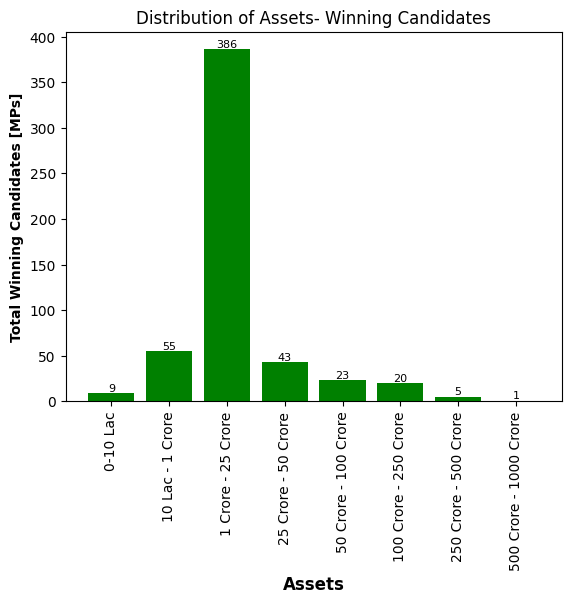

In [91]:
plt.bar(x=assets_winner_review["assets_inwords"], height=assets_winner_review["count"],color="g")
plt.xlabel('Assets', weight='bold', fontsize=12)
plt.ylabel('Total Winning Candidates [MPs]', weight='bold', fontsize=10)
plt.title('Distribution of Assets- Winning Candidates')
plt.yticks(np.arange(0,401,50))

plt.xticks( rotation='vertical')  # Rotate x-axis labels vertically)
for x, y in zip(assets_winner_review["assets_inwords"], assets_winner_review["count"]):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

plt.show()

In [92]:
success_ratio = assets_review.merge(assets_winner_review,on="assets_inwords",how="inner")

success_ratio.rename(columns={"count_x":"Total Candiates","count_y":"candidates won"},inplace=True)
success_ratio

success_ratio["success Rate"]=success_ratio["candidates won"]/success_ratio["Total Candiates"]*100
success_ratio.sort_values(by="assets_inwords",inplace=True)

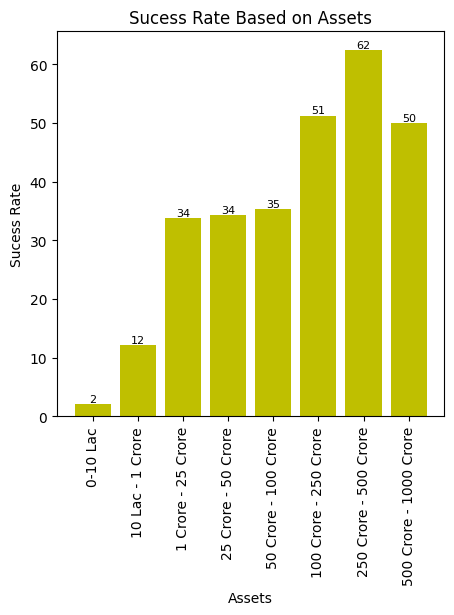

In [93]:
plt.figure(figsize=(5, 5))
plt.bar(x=success_ratio["assets_inwords"], height=success_ratio["success Rate"],color="y")
plt.xlabel('Assets')
plt.ylabel('Sucess Rate')
plt.title('Sucess Rate Based on Assets')
plt.xticks( rotation='vertical')  # Rotate x-axis labels vertically)
for x, y in zip(success_ratio["assets_inwords"], success_ratio["success Rate"]):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
plt.show()

In [15]:
pivot=df.pivot_table(index=["party"],values="assets",aggfunc="sum").sort_values(by="assets",ascending=False).head(5)
pivot_index_list = pivot.index.tolist()
pivot_index_list

['INC', 'BJP', 'YSRCP', 'TDP', 'BSP']

In [16]:
#parties and asset distribution
selected_parties = ['INC', 'BJP', 'YSRCP', 'TDP', 'BSP']
filtered_df = df[df['party'].isin(selected_parties)]

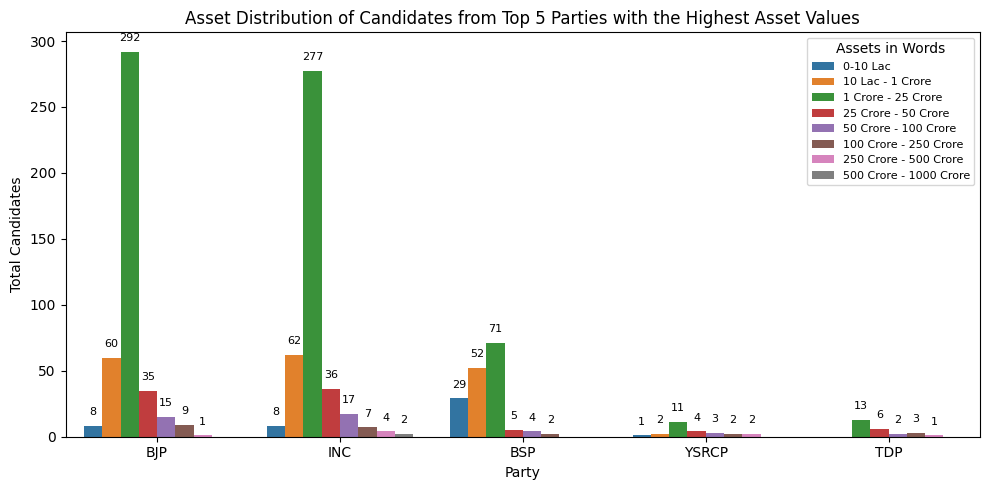

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=filtered_df['party'], hue=filtered_df['assets_inwords'])
for p in ax.patches:
    count = int(p.get_height())  # Convert count to an integer
    if count > 0:  # Skip annotation if count is 0
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
plt.xlabel("Party", fontsize=10)
plt.ylabel("Total Candidates", fontsize=10)
plt.legend(title='Assets in Words', fontsize=8)
plt.title("Asset Distribution of Candidates from Top 5 Parties with the Highest Asset Values", fontsize=12)
plt.tight_layout()
plt.show()

## Assets vs Liabilities ##

In [163]:
top_party_assetswise=df.pivot_table(index="party",values=["assets","liabilities"],aggfunc="sum").sort_values(by="assets",ascending=False).head(5)
top_party_assetswise

,assets,liabilities
party,,
INC,83412502558,10892212739
BJP,56846800470,8950734611
YSRCP,15736391083,2993019605
TDP,14444975063,2899965426
BSP,12476010257,2273961275


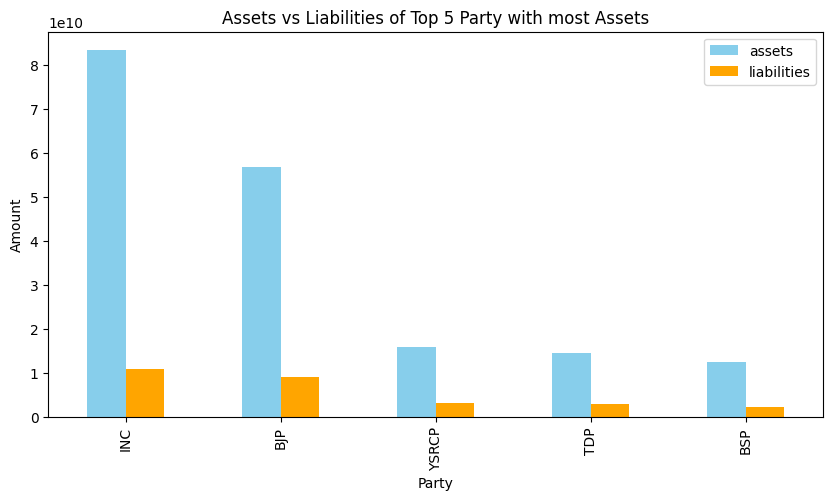

In [98]:
top_party_assetswise.plot(kind="bar", figsize=(10,5), color=['skyblue', 'orange'])
plt.title("Assets vs Liabilities of Top 5 Party with most Assets")
plt.xlabel("Party")
plt.ylabel("Amount")
plt.show()

# CATOGERY WISE DISTRIBUTION #

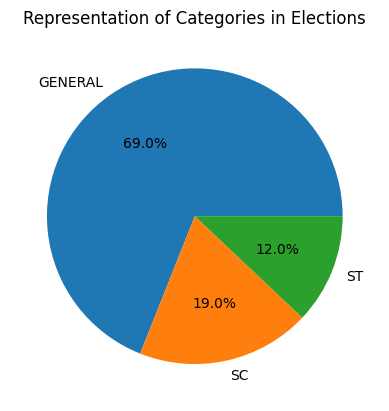

In [99]:
categorywise_contested=df.category.value_counts().reset_index()
categorywise_contested
plt.pie(x=categorywise_contested['count'], labels=categorywise_contested['category'], autopct='%1.1f%%')
plt.title("Representation of Categories in Elections")
plt.show()

In [100]:
categorywise_won=df_winner.category.value_counts().reset_index()
categorywise_won

,category,count
0,GENERAL,400
1,SC,86
2,ST,56


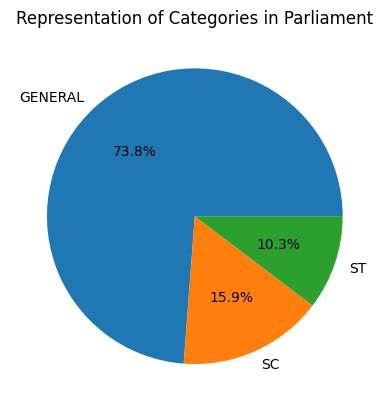

In [101]:
plt.pie(x=categorywise_won['count'], labels=categorywise_won['category'], autopct='%1.1f%%')
plt.title("Representation of Categories in Parliament")
plt.show()

In [102]:
sucess_rate_catogerywise=categorywise_contested.merge(categorywise_won,on="category",how="inner")
sucess_rate_catogerywise.rename(columns={"count_x":"contested","count_y":"won"},inplace=True)
sucess_rate_catogerywise

sucess_rate_catogerywise["success rate"]=sucess_rate_catogerywise.won/sucess_rate_catogerywise.contested*100
sucess_rate_catogerywise

,category,contested,won,success rate
0,GENERAL,1392,400,28.735632
1,SC,383,86,22.454308
2,ST,243,56,23.045267


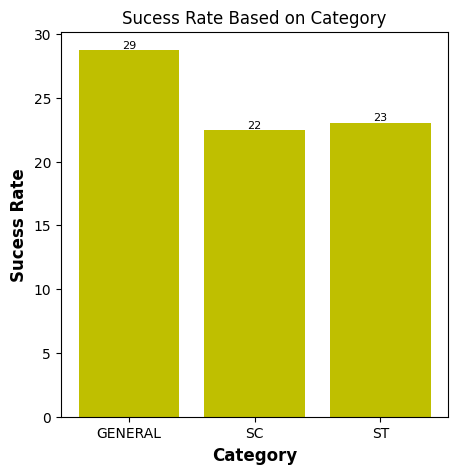

In [103]:
plt.figure(figsize=(5, 5))
plt.bar(x=sucess_rate_catogerywise["category"], height=sucess_rate_catogerywise["success rate"],color="y")
plt.xlabel('Category', weight='bold', fontsize=12)
plt.ylabel('Sucess Rate', weight='bold', fontsize=12)
plt.title('Sucess Rate Based on Category')
  # Rotate x-axis labels vertically)
for x, y in zip(sucess_rate_catogerywise["category"],sucess_rate_catogerywise["success rate"]):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
plt.show()

# ClOSE CONTEST SEATS #

In [6]:
import pandas as pd
election_result = pd.read_sql_query("SELECT *, dense_rank() over(partition by  constituency,state order by total_votes desc) as result FROM elc", con=conn)
print(election_result.shape)


(2263, 20)


In [7]:
winner_candidate=election_result[election_result.result==1]
winner_candidate=winner_candidate[["name","party","constituency","state","total_votes"]]
winner_candidate.columns=['winner_name', 'winner_party', 'constituency',"state", 'Rank1']
winner_candidate.shape

(542, 5)

In [8]:
looser_candidate=election_result[election_result.result==2]
looser_candidate=looser_candidate[["name","party","constituency","state","total_votes"]]
looser_candidate.columns=['Rank2_name', 'Rank2_party', 'constituency',"state",'Rank2']
looser_candidate.shape

(542, 5)

In [9]:
No3_candidate =election_result[election_result.result==3]
No3_candidate = No3_candidate[["name","party","constituency","state","total_votes"]]
No3_candidate.columns=['Rank3_name', 'Rank3_party', 'constituency',"state",'Rank3']
No3_candidate.shape

(499, 5)

In [10]:
Vote_margin=winner_candidate.merge(looser_candidate,on=["constituency","state"],how="left")
Vote_margin["Margin"]=Vote_margin.Rank1-Vote_margin.Rank2
Vote_margin.head(2)

,winner_name,winner_party,constituency,state,Rank1,Rank2_name,Rank2_party,Rank2,Margin
0,SOYAM BAPU RAO,BJP,ADILABAD,Telangana,377374,Godam Nagesh,TRS,318814,58560
1,Satyapal Singh Baghel,BJP,AGRA,Uttar Pradesh,646875,Manoj Kumar Soni,BSP,435329,211546


In [11]:
Total_votes_seatwise=pd.read_sql_query("SELECT state,constituency,sum(total_votes) as Total_votes FROM elc group by state,constituency ",con=conn)
Total_votes_seatwise.head(2)

,state,constituency,Total_votes
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,199875
1,Andhra Pradesh,AMALAPURAM,1203906


In [12]:
Rank_1_2=Vote_margin.merge(Total_votes_seatwise,on=["constituency","state"],how="left")
Rank_1_2.shape

(542, 10)

In [13]:
Rank_1_2["vote_diff"]=(Rank_1_2.Margin/Rank_1_2.Total_votes) *100
Rank_1_2.head(2)

,winner_name,winner_party,constituency,state,Rank1,Rank2_name,Rank2_party,Rank2,Margin,Total_votes,vote_diff
0,SOYAM BAPU RAO,BJP,ADILABAD,Telangana,377374,Godam Nagesh,TRS,318814,58560,1023462,5.721756
1,Satyapal Singh Baghel,BJP,AGRA,Uttar Pradesh,646875,Manoj Kumar Soni,BSP,435329,211546,1127353,18.764841


In [14]:
Rank_1_2_3=Rank_1_2.merge(No3_candidate ,on=["constituency","state"],how="left")
Rank_1_2_3["Rank3_marjin"]=(Rank_1_2_3["Rank2"]-Rank_1_2_3["Rank3"])/(Rank_1_2_3["Total_votes"])*100
Rank_1_2_3.head(1)

,winner_name,winner_party,constituency,state,Rank1,Rank2_name,Rank2_party,Rank2,Margin,Total_votes,vote_diff,Rank3_name,Rank3_party,Rank3,Rank3_marjin
0,SOYAM BAPU RAO,BJP,ADILABAD,Telangana,377374,Godam Nagesh,TRS,318814,58560,1023462,5.721756,RATHOD RAMESH,INC,314238.0,0.44711


In [15]:
Rank_1_2_3["vote_diff_analysis_1_2"]=pd.cut(Rank_1_2_3["vote_diff"],bins=[0,5,10,20,80],labels=["0-5","5-10","10-20","More than 20"],include_lowest=True,right=False)
Rank_1_2_3.head(2)

,winner_name,winner_party,constituency,state,Rank1,Rank2_name,Rank2_party,Rank2,Margin,Total_votes,vote_diff,Rank3_name,Rank3_party,Rank3,Rank3_marjin,vote_diff_analysis_1_2
0,SOYAM BAPU RAO,BJP,ADILABAD,Telangana,377374,Godam Nagesh,TRS,318814,58560,1023462,5.721756,RATHOD RAMESH,INC,314238.0,0.447110,5-10
1,Satyapal Singh Baghel,BJP,AGRA,Uttar Pradesh,646875,Manoj Kumar Soni,BSP,435329,211546,1127353,18.764841,Preeta Harit,INC,45149.0,34.610277,10-20


In [16]:
close_contest_seats=Rank_1_2_3["vote_diff_analysis_1_2"].value_counts().reset_index()
close_contest_seats.columns=["vote_diff_analysis_1_2","no of seats"]
close_contest_seats.sort_values(by="vote_diff_analysis_1_2",inplace=True)
close_contest_seats


,vote_diff_analysis_1_2,no of seats
2,0-5,95
3,5-10,83
1,10-20,144
0,More than 20,220


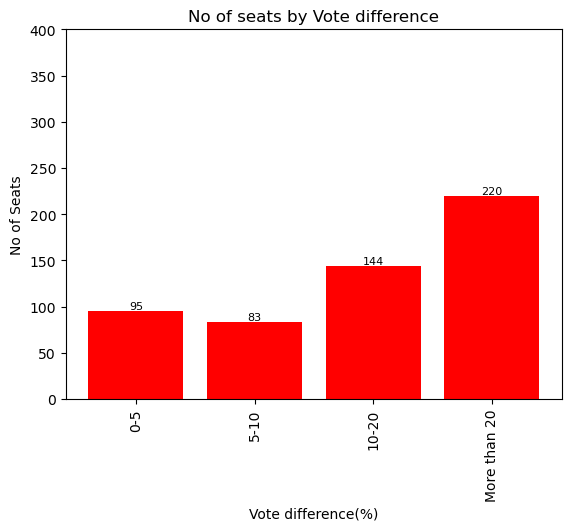

In [17]:
plt.bar(x=close_contest_seats["vote_diff_analysis_1_2"], height=close_contest_seats["no of seats"],color="r")
plt.xlabel('Vote difference(%)')
plt.ylabel('No of Seats')
plt.title('No of seats by Vote difference')
plt.yticks(np.arange(0,401,50))

plt.xticks( rotation='vertical')  # Rotate x-axis labels vertically)
for x, y in zip(close_contest_seats["vote_diff_analysis_1_2"],close_contest_seats["no of seats"]):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

plt.show()

# BJP VS ALL

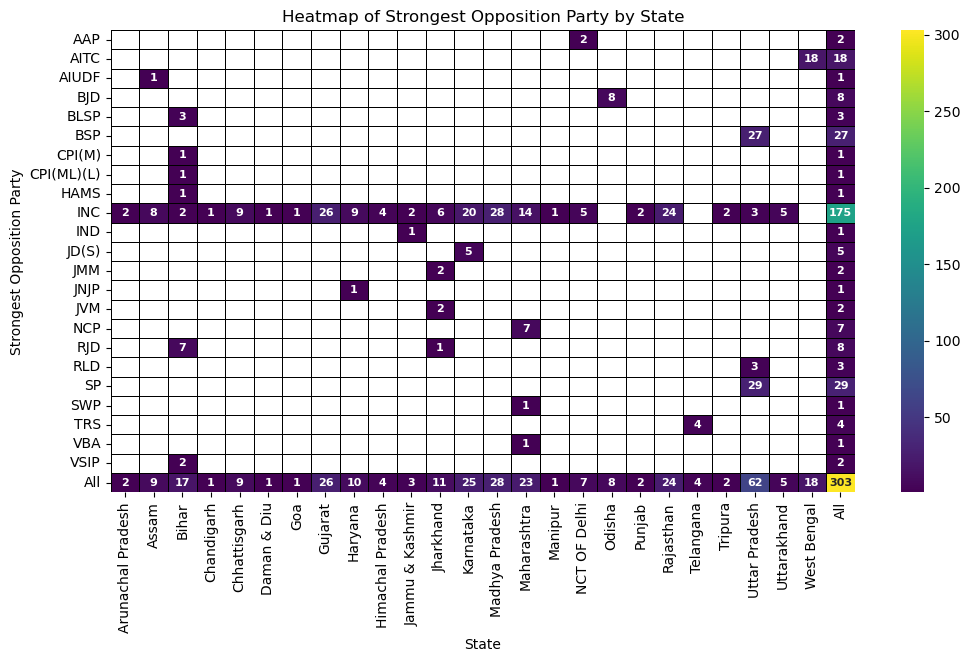

In [18]:
Bjp_winner=Rank_1_2_3[(Rank_1_2_3.winner_party=="BJP")]
strongest_ops_to_bjp =Bjp_winner.pivot_table(index=["Rank2_party"],columns="state",values="Rank2_name",aggfunc="count",margins=True)
plt.figure(figsize=(12, 6))
sns.heatmap(strongest_ops_to_bjp, cmap='viridis', linewidths=.5, linecolor='black',annot=True, fmt='g', annot_kws={"size": 8, "weight": "bold"})
plt.xlabel('State')
plt.ylabel('Strongest Opposition Party')
plt.title('Heatmap of Strongest Opposition Party by State')
plt.show()


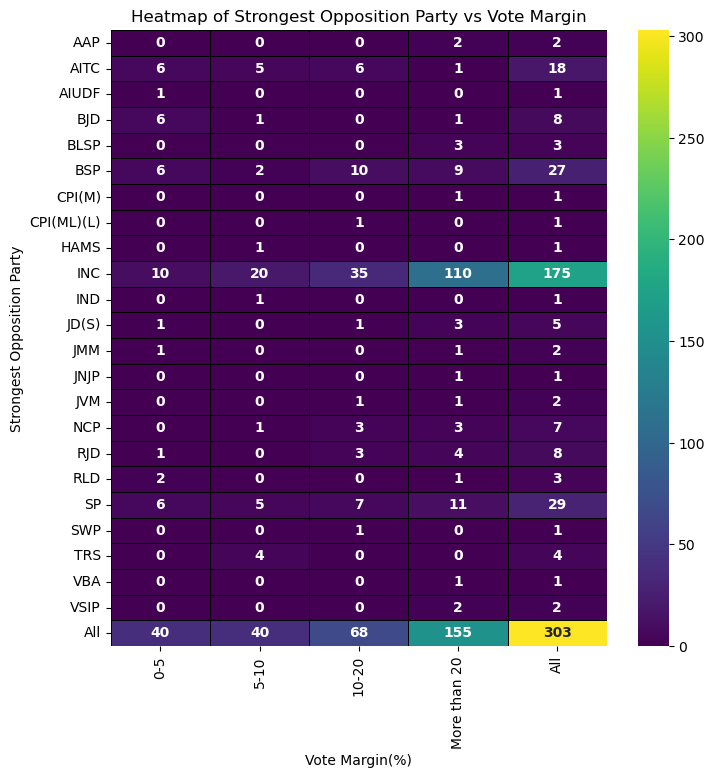

In [20]:
Bjp_winner=Rank_1_2_3[(Rank_1_2_3.winner_party=="BJP")]
vote_diff_analysis=Bjp_winner.pivot_table(index=["Rank2_party"],columns="vote_diff_analysis_1_2",values="Rank2_name",aggfunc="count",margins=True)
plt.figure(figsize=(8, 8))
sns.heatmap(vote_diff_analysis, cmap='viridis', linewidths=.5, linecolor='black',annot=True, fmt='g', annot_kws={"size": 10, "weight": "bold"})
plt.xlabel('Vote Margin(%)')
plt.ylabel('Strongest Opposition Party')
plt.xticks( rotation='vertical')
plt.title('Heatmap of Strongest Opposition Party vs Vote Margin')
plt.show()

# BJP VS INC #

In [21]:
cong_1_bjp_2=Rank_1_2_3[(Rank_1_2_3.winner_party=="INC") & (Rank_1_2_3.Rank2_party=="BJP")].shape[0]
print (f"there are only {cong_1_bjp_2} seats where INC won against BJP ")
bjp_1_cong_2=Rank_1_2_3[(Rank_1_2_3.winner_party=="BJP") & (Rank_1_2_3.Rank2_party=="INC")].shape[0]
print (f"there are only {bjp_1_cong_2} seats where BJP won against INC")

there are only 15 seats where INC won against BJP 
there are only 175 seats where BJP won against INC


In [22]:
vote_diff_bjp=Rank_1_2_3[(Rank_1_2_3.winner_party=="BJP") & (Rank_1_2_3.Rank2_party=="INC")]
print("vote diff of total votes on bjp 1 and cong 2 is",vote_diff_bjp.vote_diff.mean(),"%")
vote_diff_bjp.head(2)

vote diff of total votes on bjp 1 and cong 2 is 24.273615695129017 %


,winner_name,winner_party,constituency,state,Rank1,Rank2_name,Rank2_party,Rank2,Margin,Total_votes,vote_diff,Rank3_name,Rank3_party,Rank3,Rank3_marjin,vote_diff_analysis_1_2
3,Patel Hasmukhbhai Somabhai,BJP,AHMEDABAD EAST,Gujarat,749834,Gitaben Patel,INC,315504,434330,1065338,40.769221,NaN,NaN,NaN,NaN,More than 20
4,DR. KIRIT P. SOLANKI,BJP,AHMEDABAD WEST,Gujarat,641622,RAJU PARMAR,INC,320076,321546,986445,32.596445,NOTA,NOTA,14719.0,30.955299,More than 20


In [23]:
bjp_vs_cong=vote_diff_bjp["vote_diff_analysis_1_2"].value_counts().reset_index().sort_values(by="vote_diff_analysis_1_2")

bjp_vs_cong.columns=["vote_margin","no of seats"]
bjp_vs_cong

,vote_margin,no of seats
3,0-5,10
2,5-10,20
1,10-20,35
0,More than 20,110


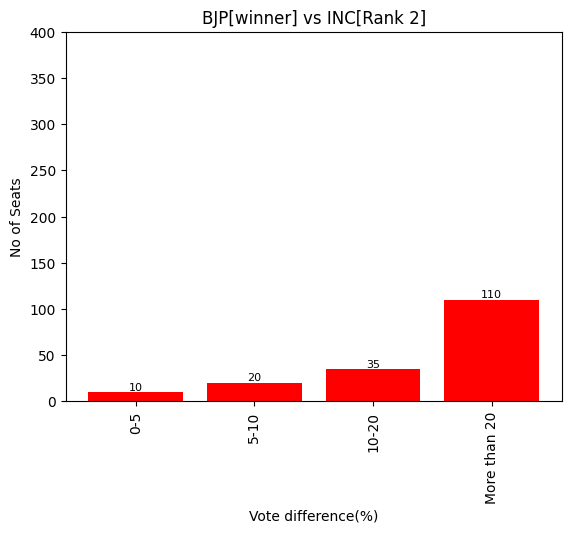

 NO of seats where diff is less than 10% can be considered as close contested and more than 20 can be considered as one sided victory


In [52]:
plt.bar(x=bjp_vs_cong["vote_margin"], height=bjp_vs_cong["no of seats"],color="r")
plt.xlabel('Vote difference(%)')
plt.ylabel('No of Seats')
plt.title('BJP[winner] vs INC[Rank 2]')
plt.yticks(np.arange(0,401,50))

plt.xticks( rotation='vertical')  # Rotate x-axis labels vertically)
for x, y in zip(bjp_vs_cong["vote_margin"],bjp_vs_cong["no of seats"]):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

plt.show()
print(" NO of seats where diff is less than 10% can be considered as close contested and more than 20 can be considered as one sided victory")

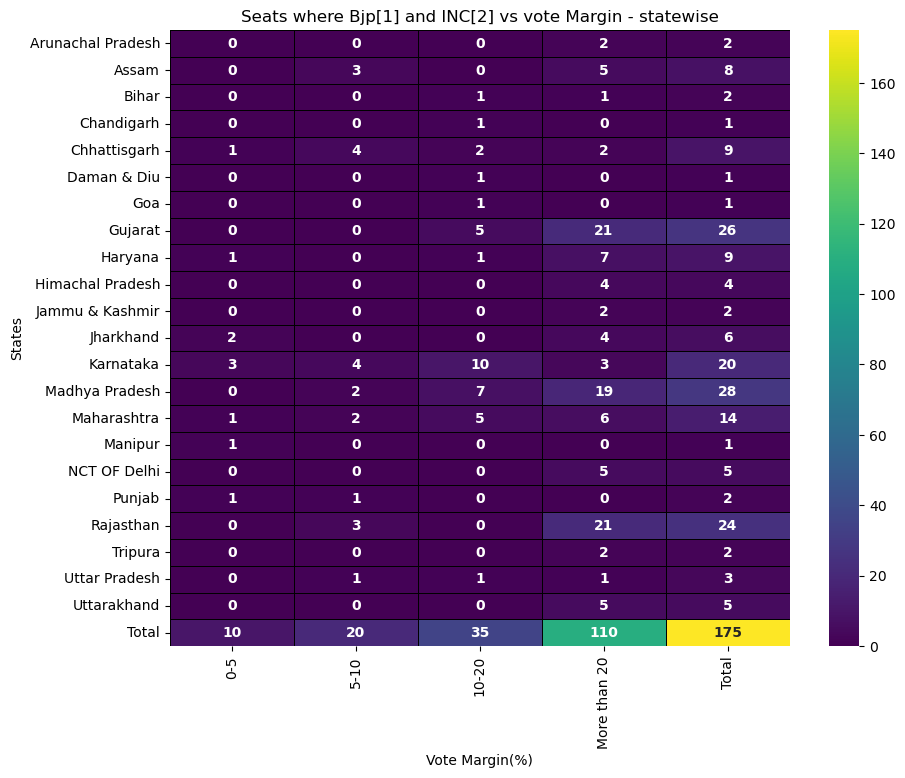

In [24]:
cong_vs_bjp_statewise=vote_diff_bjp.pivot_table(index=["state"],columns="vote_diff_analysis_1_2",values="Rank2_name",aggfunc="count",margins=True,margins_name="Total")
cong_vs_bjp_statewise
plt.figure(figsize=(10, 8))
sns.heatmap(cong_vs_bjp_statewise, cmap='viridis', linewidths=.5, linecolor='black',annot=True, fmt='g', annot_kws={"size": 10, "weight": "bold"})
plt.xlabel('Vote Margin(%)')
plt.ylabel('States')
plt.xticks( rotation='vertical')
plt.title('Seats where Bjp[1] and INC[2] vs vote Margin - statewise')
plt.show()

In [280]:
Rank_1_2_3.head(3)

,winner_name,winner_party,constituency,state,Rank1,Rank2_name,Rank2_party,Rank2,Margin,Total_votes,vote_diff,Rank3_name,Rank3_party,Rank3,Rank3_marjin,vote_diff_analysis_1_2
0,SOYAM BAPU RAO,BJP,ADILABAD,Telangana,377374,Godam Nagesh,BRS,318814,58560,1023462,5.721756,RATHOD RAMESH,INC,314238.0,0.447110,5-10
1,Satyapal Singh Baghel,BJP,AGRA,Uttar Pradesh,646875,Manoj Kumar Soni,BSP,435329,211546,1127353,18.764841,Preeta Harit,INC,45149.0,34.610277,10-20
2,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,BJP,AHMADNAGAR,Maharashtra,704660,SANGRAM ARUNKAKA JAGTAP,NCP,423186,281474,1159653,24.272261,SUDHAKAR LAXMAN AVHAD,VBA,31807.0,33.749665,More than 20


In [278]:
Rank_1_2_3[(Rank_1_2_3.winner_party=="BJP")&(Rank_1_2_3.Rank2_party=="INC")&(Rank_1_2_3.vote_diff<20)&(Rank_1_2_3.Rank3_marjin<15)].shape[0]
# with this we can say there is only 2 seats out of 65 seats where elections were competetive[less than 20% margin]
#where inc lost to bjp bcoz of third party influence so it means cong can work strongly on those 65 seats to challenge bjp in next election 

2


# Criminal status #

In [17]:
df['criminal status'] = pd.cut(df['criminal_cases'], bins=[0,1,300], labels=["No","Yes"],include_lowest=False,right=False) #right=false exclude the upper bin(upper limit)

In [18]:
criminal_status_candidates=df['criminal status'].value_counts().reset_index()
criminal_status_candidates.columns=["criminal status","candidates"]


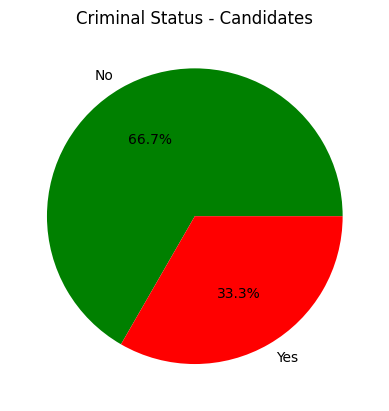

In [93]:
plt.pie(x=criminal_status_candidates['candidates'], labels=criminal_status_candidates['criminal status'], autopct='%1.1f%%',colors=["green","Red"])
plt.title("Criminal Status - Candidates")
plt.show()

In [19]:
df_winner=df[df.winner==1]
criminal_status_winner=df_winner['criminal status'].value_counts().reset_index()
criminal_status_winner.columns=["criminal status","MPs"]


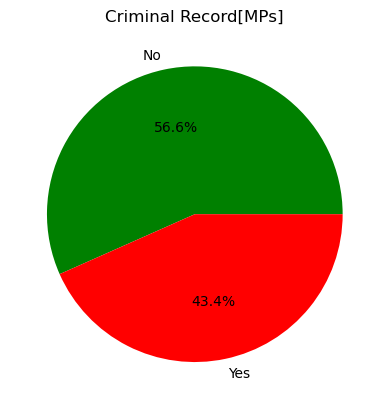

In [304]:
plt.pie(x=criminal_status_winner['MPs'], labels=criminal_status_winner['criminal status'], autopct='%1.1f%%',colors=["green","Red"])
plt.title("Criminal Record[MPs]")
plt.show()

In [95]:
crime_status_contested=df.pivot_table(index="party",columns="criminal status",values="symbol",aggfunc="count")
crime_status_contested.columns=["No","Yes"]
crime_status_contested.sort_values(by="Yes",ascending=False,inplace=True)
crime_status_contested=crime_status_contested.head(15)


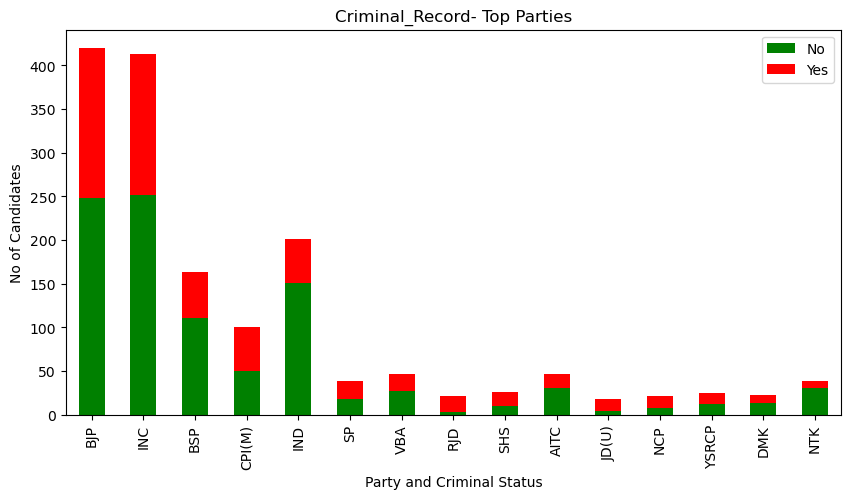

In [306]:
crime_status_contested.plot(kind='bar',figsize=(10,5),color=["g","red"],stacked=True)
plt.xlabel("Party and Criminal Status")
plt.ylabel("No of Candidates")
plt.title("Criminal_Record- Top Parties")
plt.show()


In [96]:
df_winner=df[df.winner==1]
crime_status_won=df_winner.pivot_table(index="party",columns="criminal status",values="symbol",aggfunc="count")
crime_status_won.columns=["No","Yes"]
crime_status_won.sort_values(by="Yes",ascending=False,inplace=True)
crime_status_won=crime_status_won.head(15)


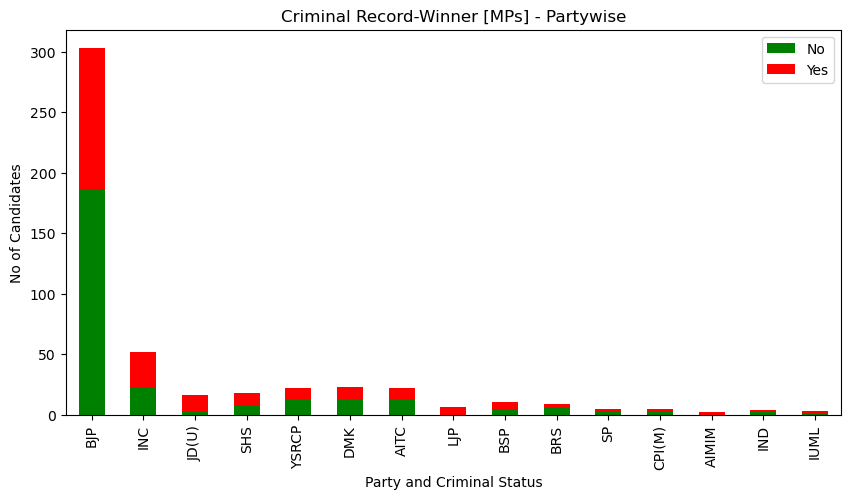

In [319]:
crime_status_won.plot(kind='bar',figsize=(10,5),color=["g","red"],stacked=True)
plt.xlabel("Party and Criminal Status")
plt.ylabel("No of Candidates")
plt.title("Criminal Record-Winner [MPs] - Partywise")
plt.show()


In [97]:

crime_status_statewise_candidates=df.pivot_table(index="state",columns="criminal status",values="symbol",aggfunc="count")
crime_status_statewise_candidates.columns=["No","Yes"]
crime_status_statewise_candidates.sort_values(by="Yes",ascending=False,inplace=True)



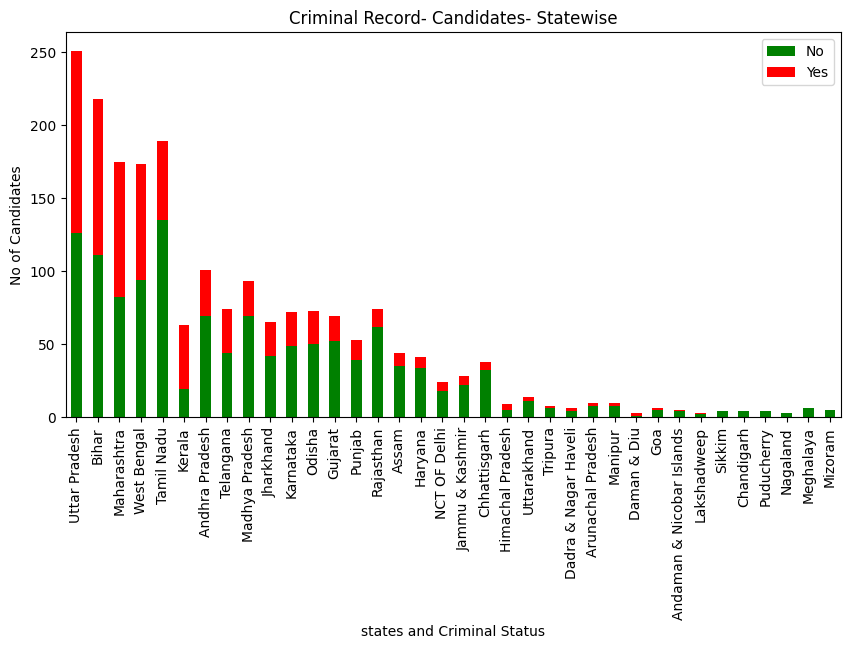

In [99]:
crime_status_statewise_candidates.plot(kind='bar',figsize=(10,5),color=["green","red"],stacked=True)
plt.xlabel("states and Criminal Status")
plt.ylabel("No of Candidates")
plt.title("Criminal Record- Candidates- Statewise")
plt.show()


In [100]:
df_winner=df[df.winner==1]
crime_status_statewise_mps=df_winner.pivot_table(index="state",columns="criminal status",values="symbol",aggfunc="count")
crime_status_statewise_mps.columns=["No","Yes"]
crime_status_statewise_mps.sort_values(by="Yes",ascending=False,inplace=True)

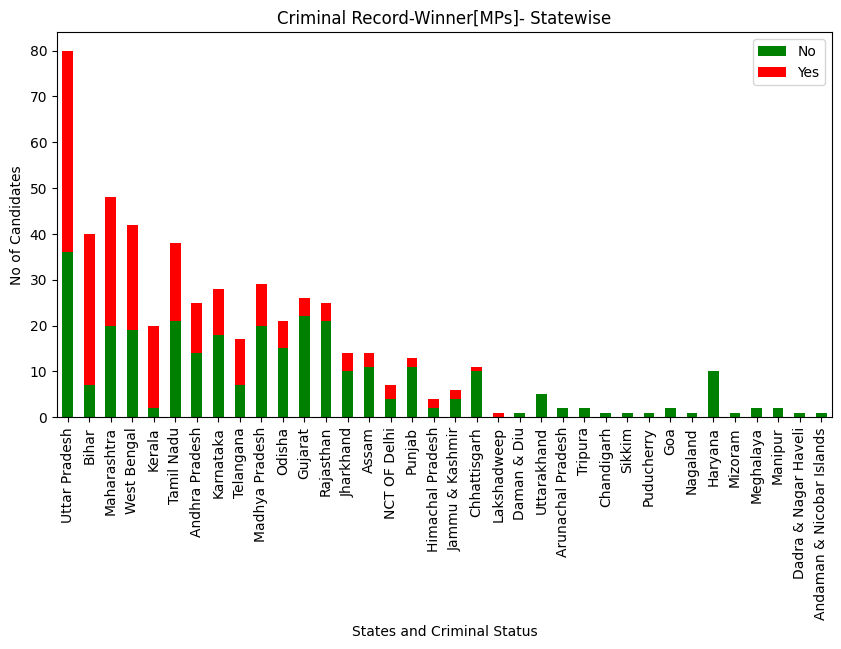

In [102]:
crime_status_statewise_mps.plot(kind='bar',figsize=(10,5),color=["green","red"],stacked=True)
plt.xlabel("States and Criminal Status")
plt.ylabel("No of Candidates")
plt.title("Criminal Record-Winner[MPs]- Statewise")
plt.show()

# Average Cases on Candidates having criminal record

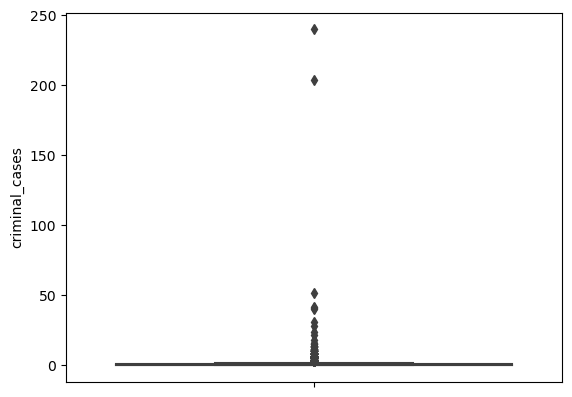

In [20]:
sns.boxplot(y=df.criminal_cases)
plt.show()


In [21]:
#removing outliers
Q1 = df["criminal_cases"].quantile(0.25)
Q3 = df["criminal_cases"].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out values beyond the bounds
crime_df = df[(df["criminal_cases"] >= lower_bound) & (df["criminal_cases"] <= upper_bound)]
crime_df[crime_df.winner==1].shape

(435, 20)

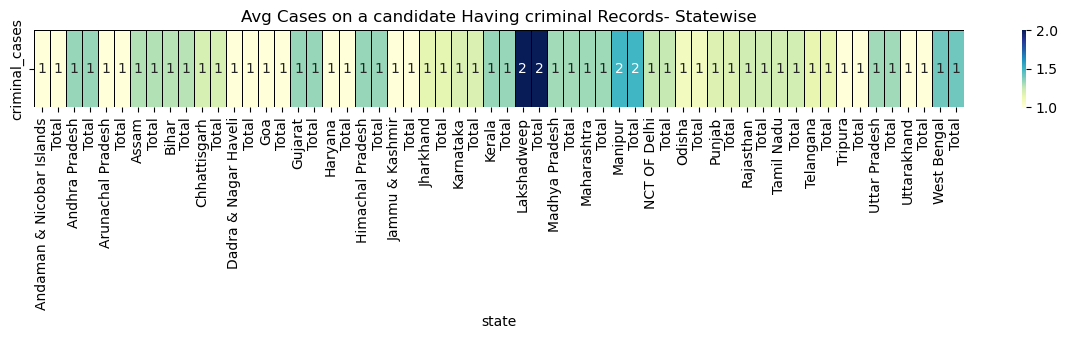

In [22]:
Avg_cases_statewise=crime_df[(crime_df["party"]!="NOTA")& (crime_df["criminal_cases"]>0) ]
Avg_cases_statewise=Avg_cases_statewise.pivot_table(columns="state",values="criminal_cases",aggfunc="mean",margins=True,margins_name="Total")
# Plotting the heatmap
plt.figure(figsize=(15,1))
sns.heatmap(Avg_cases_statewise, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5, linecolor='k')

plt.title("Avg Cases on a candidate Having criminal Records- Statewise")
plt.show()


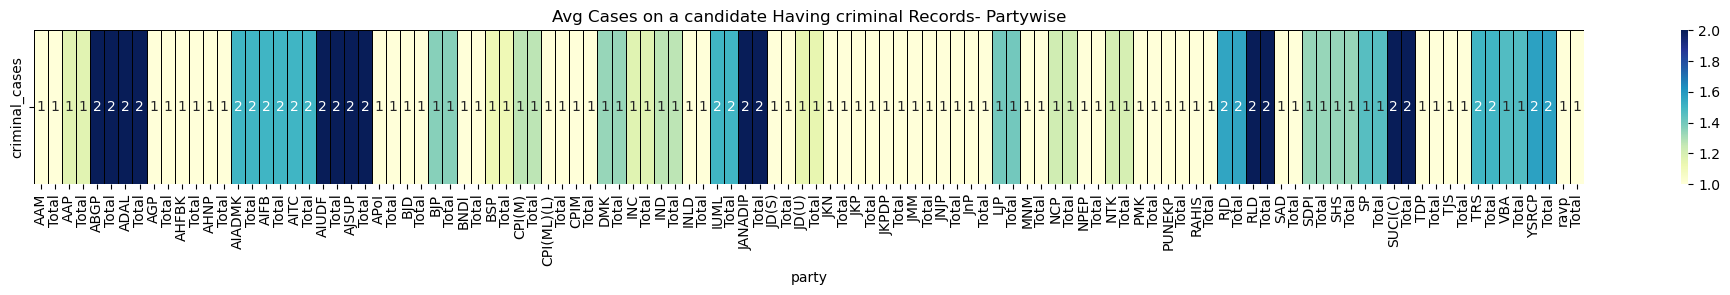

In [23]:
Avg_cases_partywise=crime_df[(crime_df["party"]!="NOTA")& (crime_df["criminal_cases"]>0) ]
Avg_cases_partywise=Avg_cases_partywise.pivot_table(columns="party",values="criminal_cases",aggfunc="mean",margins=True,margins_name="Total")
plt.figure(figsize=(25,2))
sns.heatmap(Avg_cases_partywise, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5, linecolor='k')
plt.title("Avg Cases on a candidate Having criminal Records- Partywise")
plt.show()

# Average Cases on MPs having criminal record

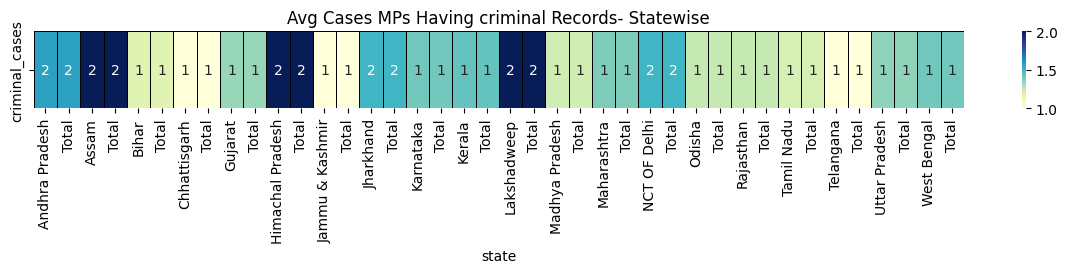

In [83]:
crime_df_winner=crime_df[crime_df.winner==1]
Avg_casesonmps_statewise=crime_df_winner[(crime_df_winner["party"]!="NOTA")& (crime_df_winner["criminal_cases"]>0) ]
Avg_casesonmps_statewise= Avg_casesonmps_statewise.pivot_table(columns="state",values="criminal_cases",aggfunc="mean",margins=True,margins_name="Total")
plt.figure(figsize=(15,1))
sns.heatmap(Avg_casesonmps_statewise, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5, linecolor='k')
plt.title("Avg Cases MPs Having criminal Records- Statewise")
plt.show()

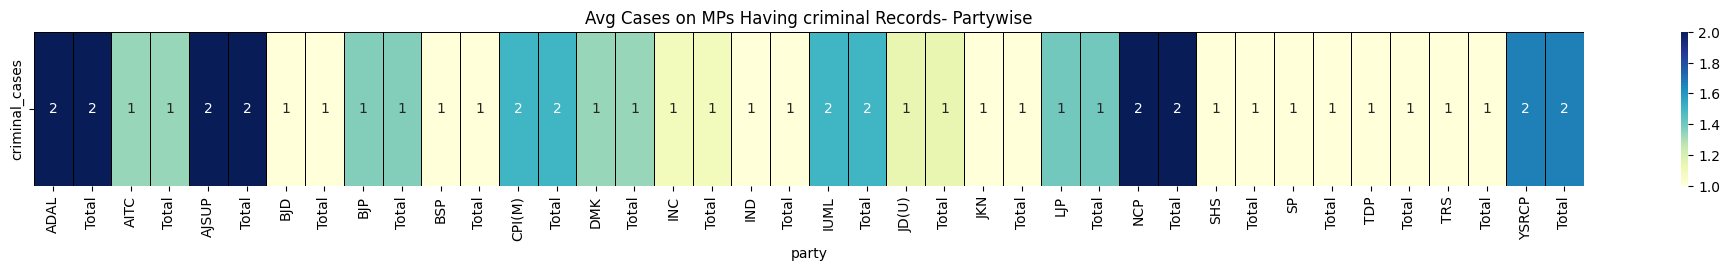

In [86]:
Avg_casesonmps_partywise=crime_df_winner[(crime_df_winner["party"]!="NOTA")& ((crime_df_winner["criminal_cases"]>0) )]
Avg_casesonmps_partywise=Avg_casesonmps_partywise.pivot_table(columns="party",values="criminal_cases",aggfunc="mean",margins=True,margins_name="Total")
plt.figure(figsize=(25,2))
sns.heatmap(Avg_casesonmps_partywise, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5, linecolor='k')
plt.title("Avg Cases on MPs Having criminal Records- Partywise")
plt.show()

# Insights

**PARTIES AND VOTE PERCENTAGE**
1. BJP(38%)  
2. INC(20%)  
3. OTHERS(33%)

**MOST CONTESTED**
1. BJP(420)  
2. INC(413)  
3. NOTA(245),people have voted for nota more than 1% on 245 seats as this data contains candidates with min 1% of vote

**Results**
1. BJP(303)-Ruling Party  
2. INC(52)-Opposition

**Sucess Rate - Partywise**
- BJP-72%
- CONG-12%
- Regional parties [YSRCP,TMC, DMK] performed Much better in terms of success rate bcoz they contest election on very less seats as compared to national parties

**Rank2 - Overall - opposition**

- CONG-209
- BJP-74
- pls refer to visualizations to understand more.


**Age and elections**

- The average age of candidates is approximately 50+.
- The average age of MPs is around 55.
- The 25-34 age group has the least representation in elections (7%) and parliament (4%).
- The 45-64 age group has the highest representation in elections (54%) and parliament (58%).
- The 45-64 age group has the best success rate in elections.
- The 25-34 age group has the lowest success rate

**Education and elections**

- Majority of the Mps and candidates are graduate and post Graduate.

**Gender and elections**

- Female Representation is very low
- Male dominated 
- Female have better success Rate
- Only 14.5 % MPs are female in parliament.
- Every polical party treats women similarly in terms of Representaion

**Money and elections**

- Most of the candidates and MPs have assets between 1 crore to 25 crores.
- The more money you have, the higher the probability of winning elections.
- The INC has the highest combined assets of candidates.
- YSRCP ranks in the top 5, even with only 25 candidates, in terms of assets.

**Category and elections**

- The General Category constitutes the majority representation in elections at 69%, and in parliament, this contribution rises to 73%.
- Conversely, the SC and ST categories display notably lower representation and a reduced success rate.
- Notably, the General Category stands out with the highest success rate.

**Close contested seats**

- 95 seats have vote differece less than 5% so they canbe considered as close 
- 220 seats were one sided with vote margin greater than 20%

**BJP vs All**

- congress comes out to be the strongest opposition on 175 seats out of 303 won by BJP.
- In some states regional parties like AITC, S.P ,B.S.P are giving tough fight to BJP
- 155 seats were one sided with vote margin greater than 20% and BJP can be considered as very strong on these seats in future elections also.
- 80 seats were closely fought with vote margin less than than 10% and BJP can be challenged here in future elections.


**BJP[1] vs CONG[2]**

- Congress emerges as the strongest opposition in 175 seats out of the 303 won by BJP.
- There are only 15 seats where BJP lost to Congress in elections.
- Upon analyzing these 175 seats, we came to know there is a 24% vote difference in total votes received by BJP and INC.
- We can say Congress is the biggest opposition, yet the weakest.
- Regional parties have almost no impact on these 175 seats.
- 110 seats were one-sided with a vote margin greater than 20%, and BJP can be considered very strong in these seats in future elections as well.
- 30 seats were closely fought with a vote margin less than 10%, and BJP can be challenged here in future elections.


**Crime vs Elections**

- Around 33% of candidates have criminal records.
- Approximately 43% of MPs have criminal records.
- Candidates with criminal records have better chances of winning elections.
- Almost all parties give opportunities to candidates with criminal records to contest elections.
- States like UP, Bihar, Kerala, West Bengal have a majority of MPs with criminal records.
- In 15 states, there are no MPs with criminal records.
- In 6 states, there are no candidates with criminal records.
- The average number of cases on candidates with a criminal record is approximately 1 after removing outliers.
- The average number of cases on MPs with a criminal record is approximately 2 after removing outliers.

**Note: For understanding Visually checkout the above Visualization**
